# Background
It is well known that the birth rate in developed countries goes down. I learned through sample project that the HAPPY WORD for parents is children. Therefore, I began to wonder what people would be happy about if they didn't have children.

In [129]:
>>> import pandas as pd
>>> df = pd.read_csv("cleaned_hm.csv")
>>> df["cleaned_hm"].head()

0    I went on a successful date with someone I fel...
1    I was happy when my son got 90% marks in his e...
2         I went to the gym this morning and did yoga.
3    We had a serious talk with some friends of our...
4    I went with grandchildren to butterfly display...
Name: cleaned_hm, dtype: object

In [130]:
df2 = pd.read_csv("/content/demographic.csv")
df2.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Set of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filtered_text)

df['cleaned_hm'] = df['cleaned_hm'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [132]:
df["cleaned_hm"].head()

0    went successful date someone felt sympathy con...
1                 happy son got 90 % marks examination
2                              went gym morning yoga .
3    serious talk friends flaky lately . understood...
4    went grandchildren butterfly display Crohn Con...
Name: cleaned_hm, dtype: object

# Q1: What would people without children be happy about?

In [133]:
# Find target people id without children
filtered_df2 = df2[df2['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid = df[df['wid'].isin(filtered_df2['wid'])]

In [134]:
df["cleaned_hm"].head()

0    went successful date someone felt sympathy con...
1                 happy son got 90 % marks examination
2                              went gym morning yoga .
3    serious talk friends flaky lately . understood...
4    went grandchildren butterfly display Crohn Con...
Name: cleaned_hm, dtype: object

<ipython-input-135-f5dc3fbcbf56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid['tokens'] = df_filtered_by_wid['cleaned_hm'].apply(word_tokenize)


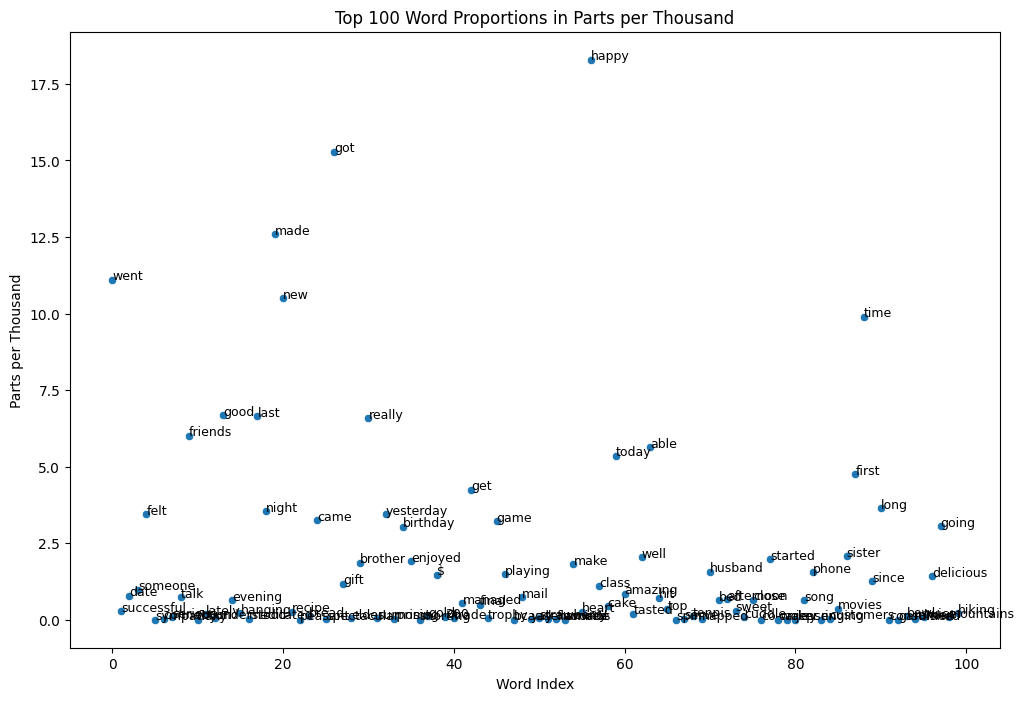

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize

# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid['tokens'] = df_filtered_by_wid['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df = freq_df.head(100).reset_index(drop=True)


# Plotting the word proportions on a scatter plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=np.arange(len(top_words_df)), y='ppt', data=top_words_df)

# Label the axes and title
plt.xlabel('Word Index')
plt.ylabel('Parts per Thousand')
plt.title('Top 100 Word Proportions in Parts per Thousand')

# Annotating the words
for i, row in top_words_df.iterrows():
    plt.text(i, row['ppt'], row['word'], fontsize=9)

plt.show()


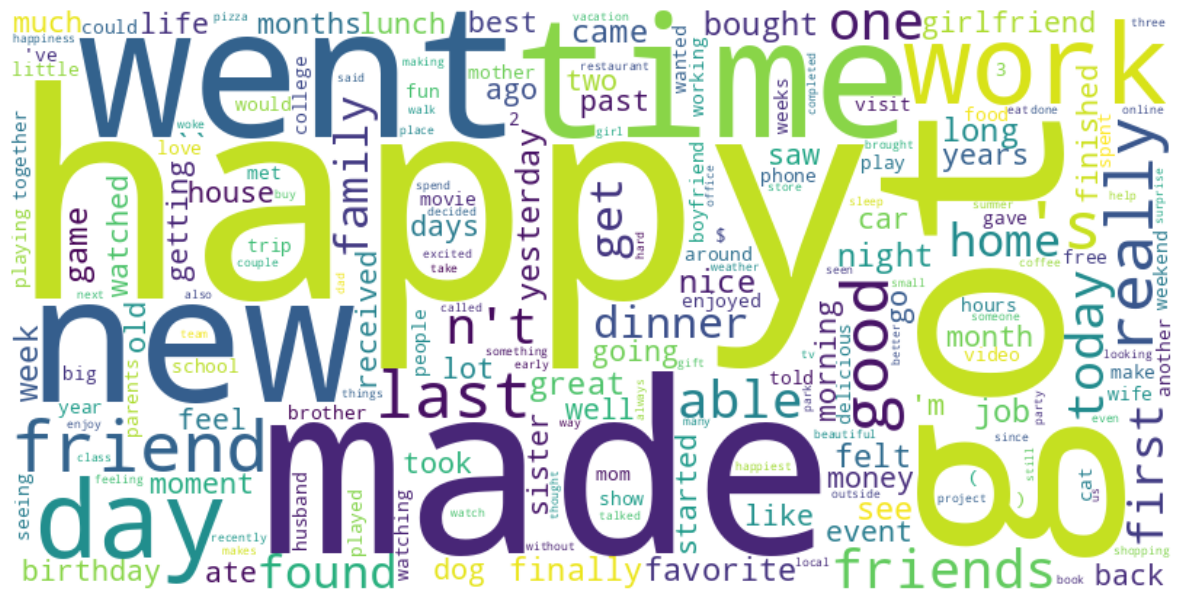

In [136]:
from wordcloud import WordCloud

# Generate the word cloud data
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)

# Display the generated word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

We found that for people without children, as we previously defined them, happy moments would often be characterized by the words 'made', 'got', 'went', 'new', 'friend'.

I think for people who don't have kids, there's a good chance they're happy when they get something new, make something new, or go somewhere new.

This result can be shown more obviously by the words frequency bar charts below.

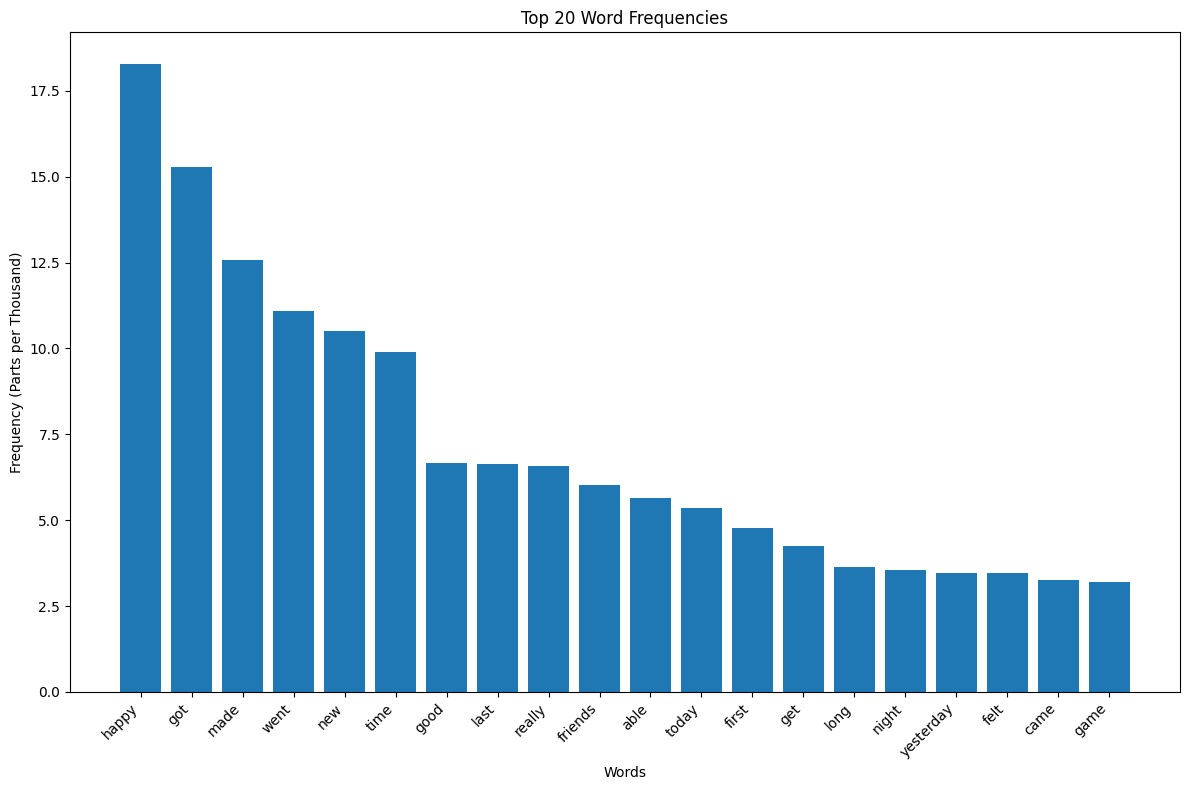

In [137]:
# Now take the top 20 out of the top 100
top_20_words = top_words_df.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

When comparing the above bar chart with the 'Word Frequency in Happy Moments for mothers / fathers' bar chart in project ['Mom, wish you happy everyday!'](https://tzstatsads.github.io/tutorials/proj1_jiaqianyu.html), I found that there is a significant difference in the things that people with children are happy about compared to people without children.

From the bar chart, 'got', 'made', 'went', 'new' reflect that people without children **like new things**. 'good', 'last', 'really' shows that they are happy with **the things they are lucky to have**. 'friends', 'game' reflects that they are happy **when they talk about friends and games**.' today', 'yesterday' shows that they are happy **when they are closer to the present**.

For me personally, if I didn't have kids in the future, I want to know what will make me happy. So, analyzing this further, do men and women without children differ on the word in happy moment?


# Q2: Do men and women without kids have different happy moments?



In [138]:
# Create a DataFrame for gender = 'm'
df_gender_m = df2[df2['gender'] == 'm']

# Create a DataFrame for gender = 'f'
df_gender_f = df2[df2['gender'] == 'f']

# Find target people id without children
filtered_df_m = df_gender_m[df_gender_m['parenthood'] == 'n']

filtered_df_f = df_gender_f[df_gender_f['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid_m = df[df['wid'].isin(filtered_df_m['wid'])]

df_filtered_by_wid_f = df[df['wid'].isin(filtered_df_f['wid'])]

<ipython-input-139-da9fc1c6aa9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_m['tokens'] = df_filtered_by_wid_m['cleaned_hm'].apply(word_tokenize)


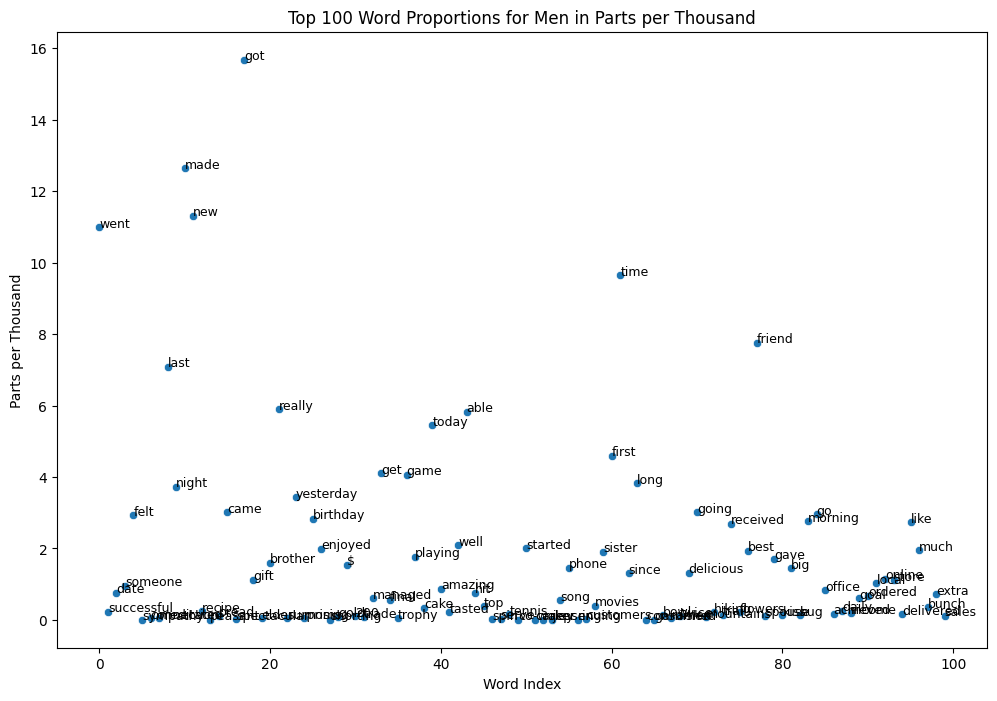

In [139]:
# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_m['tokens'] = df_filtered_by_wid_m['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_m['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df_m = freq_df.head(100).reset_index(drop=True)


# Plotting the word proportions on a scatter plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=np.arange(len(top_words_df_m)), y='ppt', data=top_words_df_m)

# Label the axes and title
plt.xlabel('Word Index')
plt.ylabel('Parts per Thousand')
plt.title('Top 100 Word Proportions for Men in Parts per Thousand')

# Annotating the words
for i, row in top_words_df_m.iterrows():
    plt.text(i, row['ppt'], row['word'], fontsize=9)

plt.show()

<ipython-input-140-849f672ee6ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_f['tokens'] = df_filtered_by_wid_f['cleaned_hm'].apply(word_tokenize)


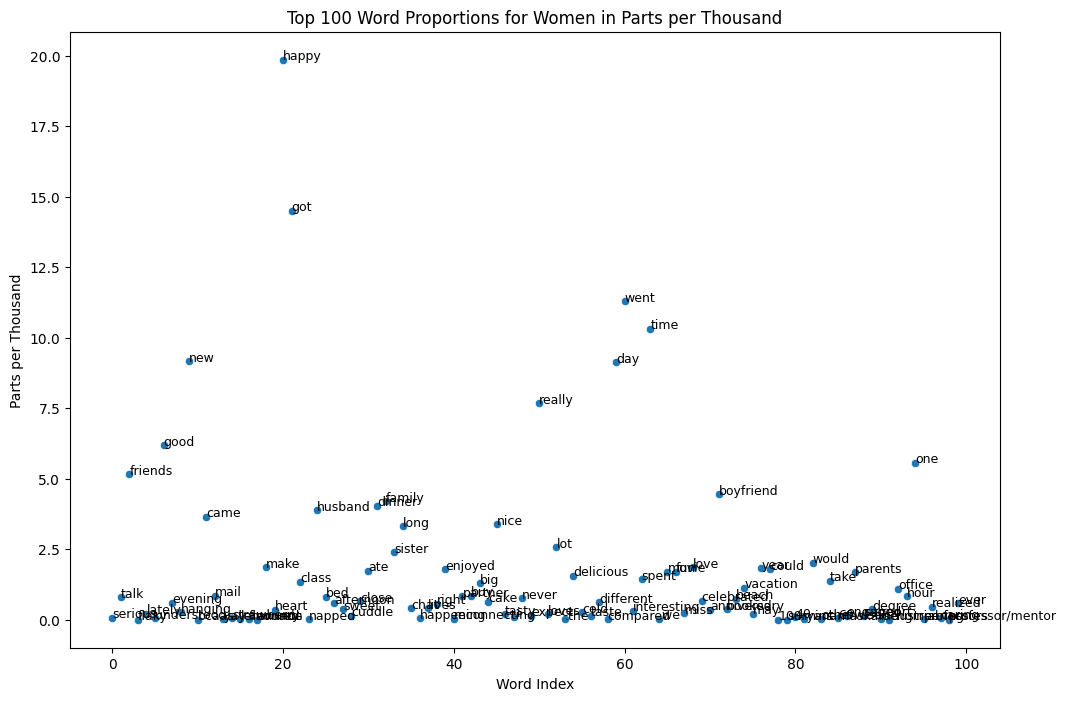

In [140]:
# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_f['tokens'] = df_filtered_by_wid_f['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_f['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df_f = freq_df.head(100).reset_index(drop=True)


# Plotting the word proportions on a scatter plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=np.arange(len(top_words_df_f)), y='ppt', data=top_words_df_f)

# Label the axes and title
plt.xlabel('Word Index')
plt.ylabel('Parts per Thousand')
plt.title('Top 100 Word Proportions for Women in Parts per Thousand')

# Annotating the words
for i, row in top_words_df_f.iterrows():
    plt.text(i, row['ppt'], row['word'], fontsize=9)

plt.show()

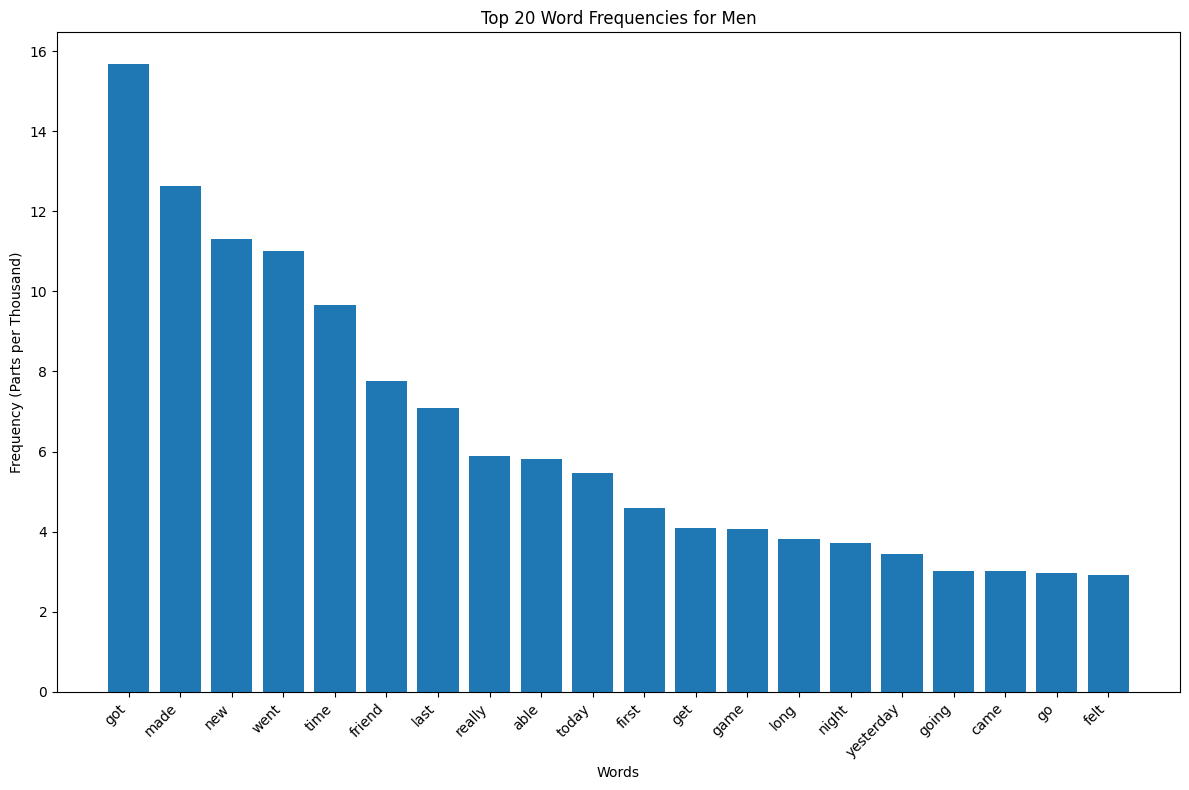

In [141]:
# Now take the top 20 out of the top 100
top_20_words = top_words_df_m.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for Men')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

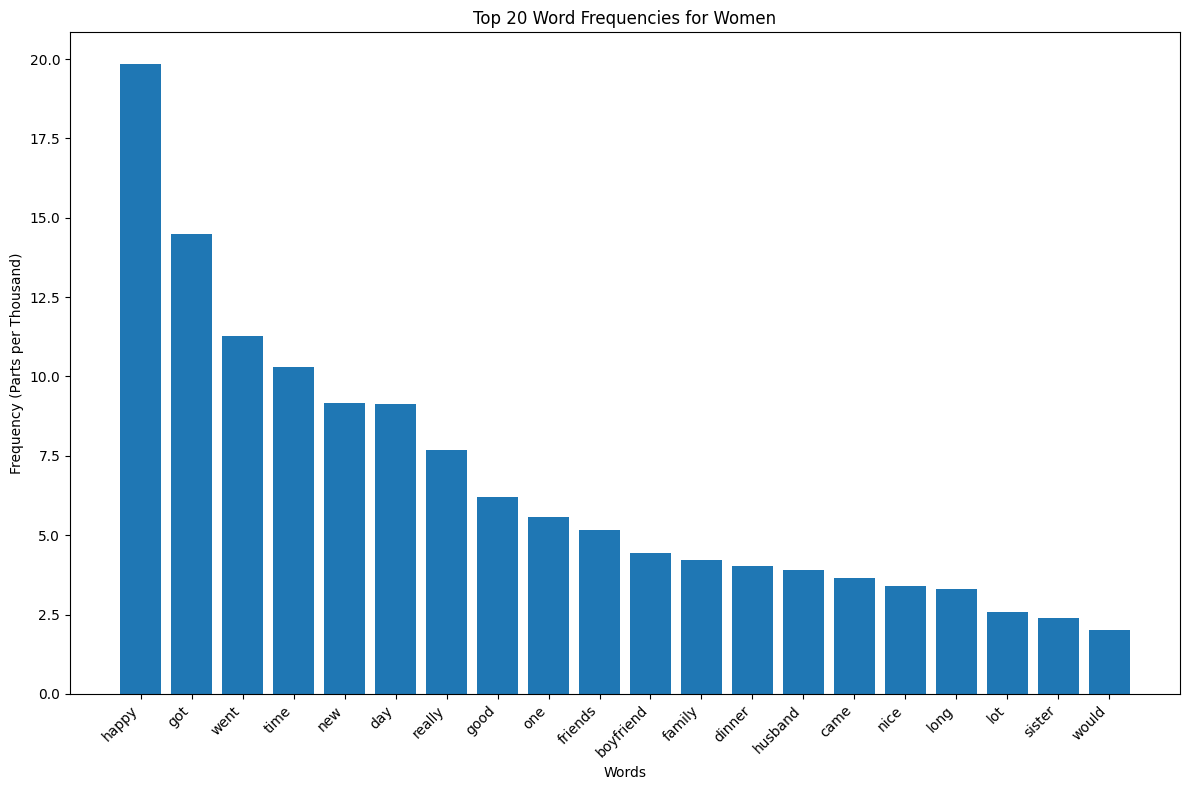

In [142]:
# Now take the top 20 out of the top 100
top_20_words = top_words_df_f.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for Women')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

Comparing the differences between the two bar graphs, I found that Men's happy moments are more in 'first', 'last' and 'game', while Women's happy moments are in 'boyfriend', 'husband', 'family', and 'sister'. **This interesting phenomenon illustrates how childless women derive pleasure from those close to them, while childless men derive more pleasure from themselves.**

But, as far as I can remember, my grandparents and I had different interests. So, word in happy moment should be different too?

Next, I'd like to take the analysis of the people without children a step further. I want to classify people by age group and study why people are happy between different age groups.

# Q3: Do people of different ages have different words in happy moment?

We segmented the data by United Nations categorization of age groups.

0-15 : child

15-24 : [youth](https://www.un.org/development/desa/youth/what-we-do/faq.html)

24-60 : adult

60+ (60-100 in this project) : [older person](https://emergency.unhcr.org/entry/43935/older-persons)

In [143]:
# Function to categorize age into groups
def categorize_age(age):
    if age < 15:
        return '0-15'
    elif age <= 24:
        return '15-24'
    elif age <= 60:
        return '24-60'
    else:
        return '60-100'

In [144]:
# Convert 'age' to numeric first
df2['age'] = pd.to_numeric(df2['age'], errors='coerce')

# Apply the function to create a new 'age_group' column
df2['age_group'] = df2['age'].apply(categorize_age)

# Count the number of rows in each group
age_group_counts = df2['age_group'].value_counts()
print(age_group_counts)

24-60     8362
15-24     2165
60-100     310
0-15         7
Name: age_group, dtype: int64


Noticed that the sample in age 0-15 group is quite small, so it may not generate the correct conclusions in that group.

<ipython-input-145-ddd9c81a9093>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_0_15['tokens'] = df_filtered_by_wid_0_15['cleaned_hm'].apply(word_tokenize)


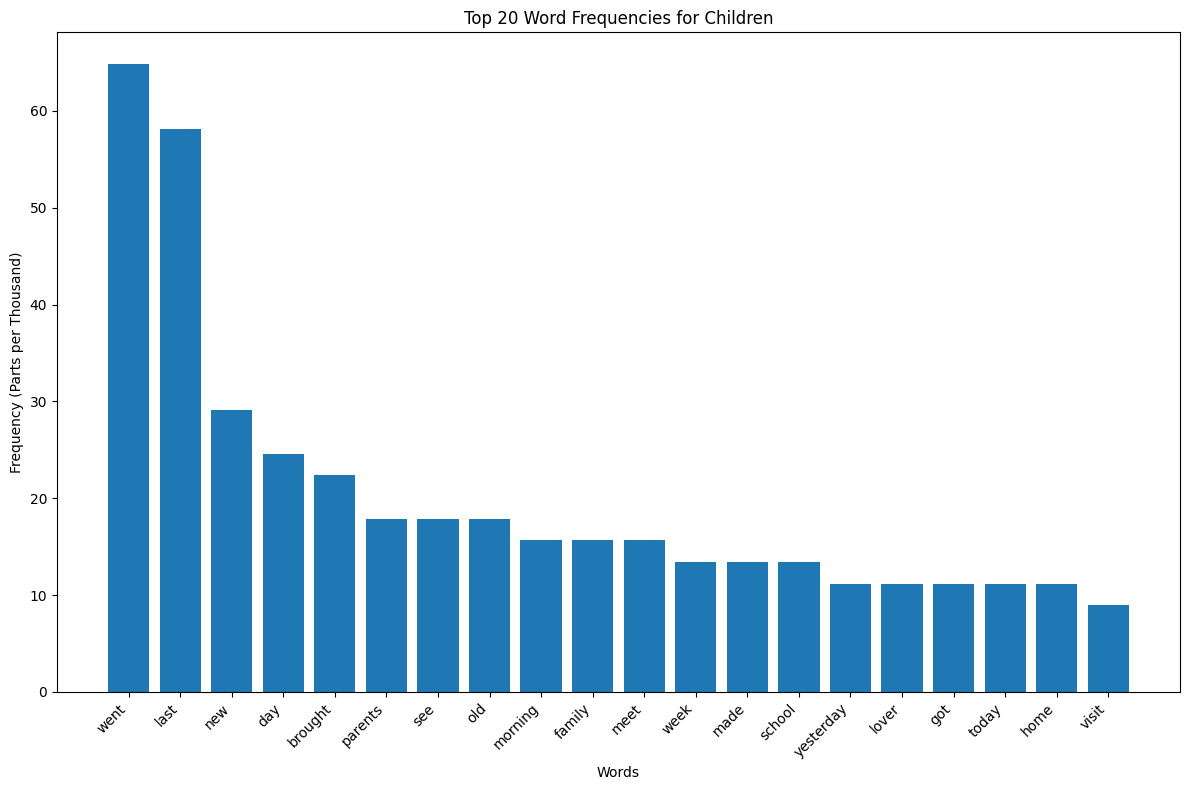

In [145]:
# Create a DataFrame for age group = '0-15'
df_0_15 = df2[df2['age_group'] == '0-15']

# Find target people id without children
filtered_df_0_15 = df_0_15[df_0_15['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid_0_15 = df[df['wid'].isin(filtered_df_0_15['wid'])]

# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_0_15['tokens'] = df_filtered_by_wid_0_15['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_0_15['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df = freq_df.head(100).reset_index(drop=True)

# Now take the top 20 out of the top 100
top_20_words = top_words_df.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for Children')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

<ipython-input-146-a5df0e2783f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_15_24['tokens'] = df_filtered_by_wid_15_24['cleaned_hm'].apply(word_tokenize)


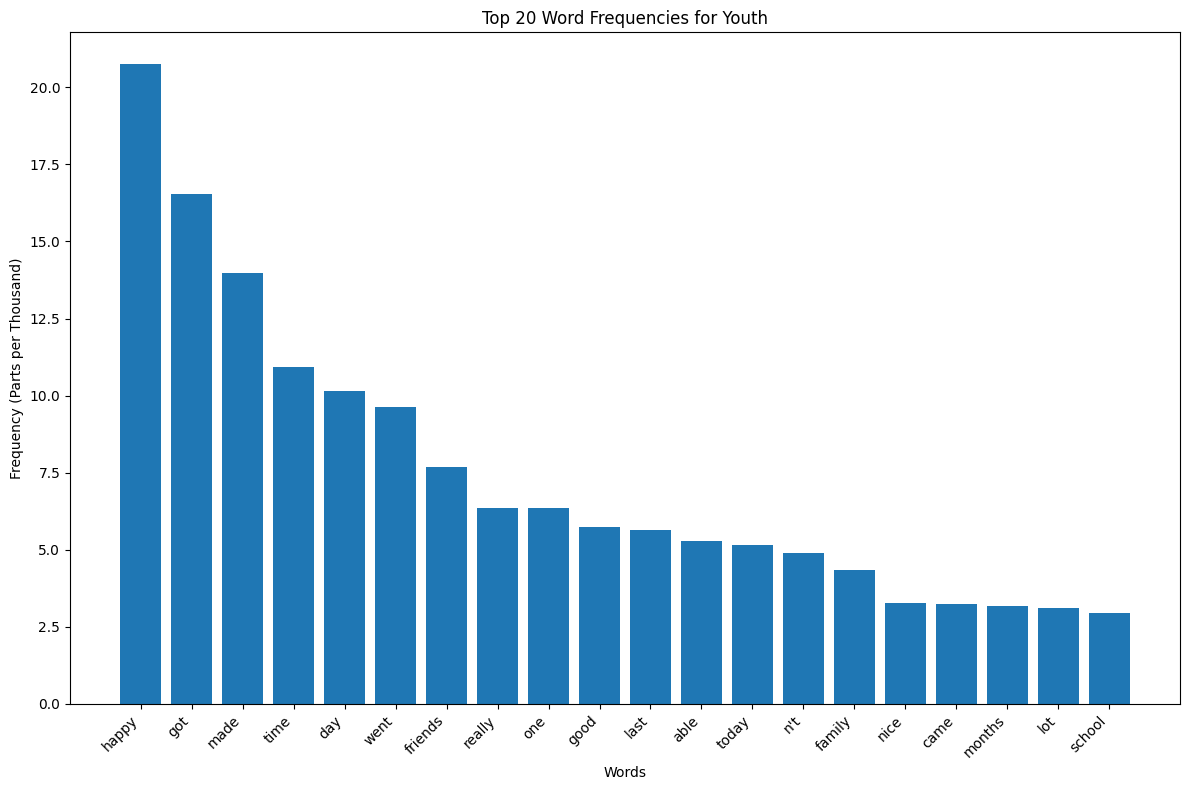

In [146]:
# Create a DataFrame for age group = '15-24'
df_15_24 = df2[df2['age_group'] == '15-24']

# Find target people id without children
filtered_df_15_24 = df_15_24[df_15_24['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid_15_24 = df[df['wid'].isin(filtered_df_15_24['wid'])]

# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_15_24['tokens'] = df_filtered_by_wid_15_24['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_15_24['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df = freq_df.head(100).reset_index(drop=True)

# Now take the top 20 out of the top 100
top_20_words = top_words_df.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for Youth')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

<ipython-input-147-35dadda68a89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_24_60['tokens'] = df_filtered_by_wid_24_60['cleaned_hm'].apply(word_tokenize)


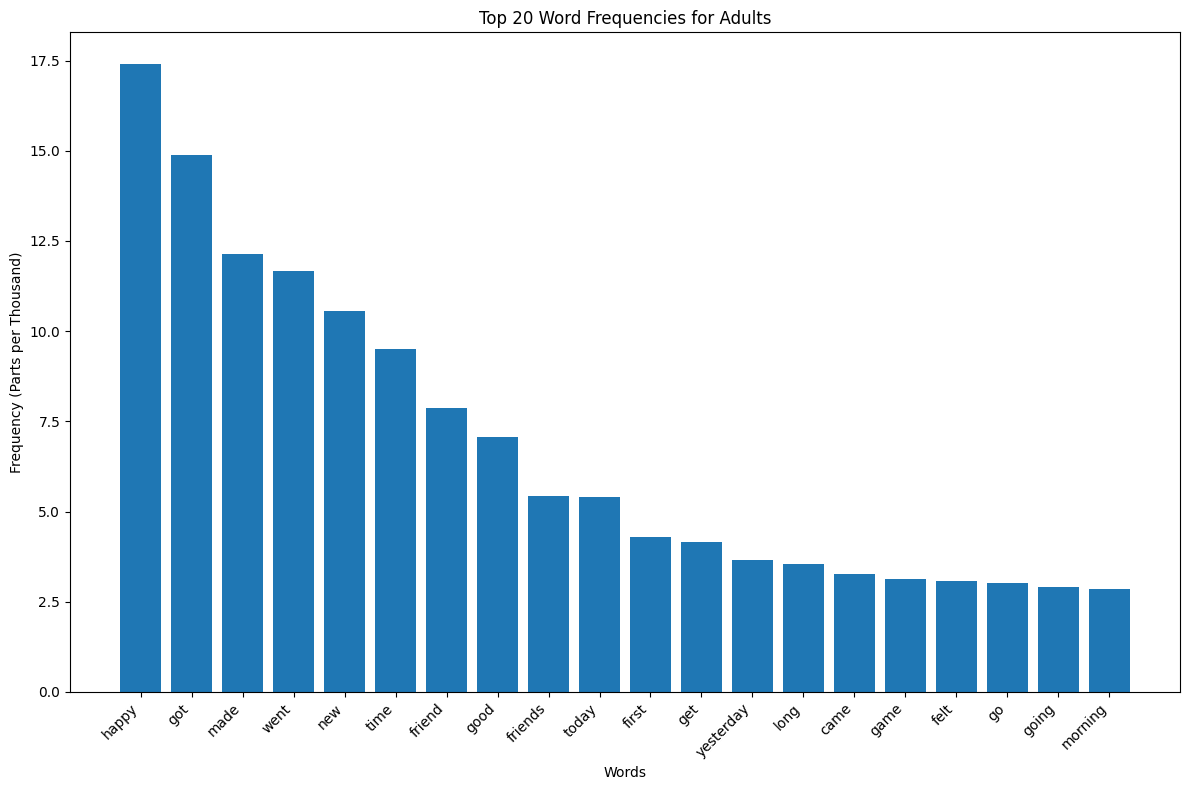

In [147]:
# Create a DataFrame for age group = '24-60'
df_24_60 = df2[df2['age_group'] == '24-60']

# Find target people id without children
filtered_df_24_60 = df_24_60[df_24_60['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid_24_60 = df[df['wid'].isin(filtered_df_24_60['wid'])]

# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_24_60['tokens'] = df_filtered_by_wid_24_60['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_24_60['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!'])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df = freq_df.head(100).reset_index(drop=True)

# Now take the top 20 out of the top 100
top_20_words = top_words_df.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for Adults')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

<ipython-input-148-3a3eefbe8d90>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_by_wid_60_100['tokens'] = df_filtered_by_wid_60_100['cleaned_hm'].apply(word_tokenize)


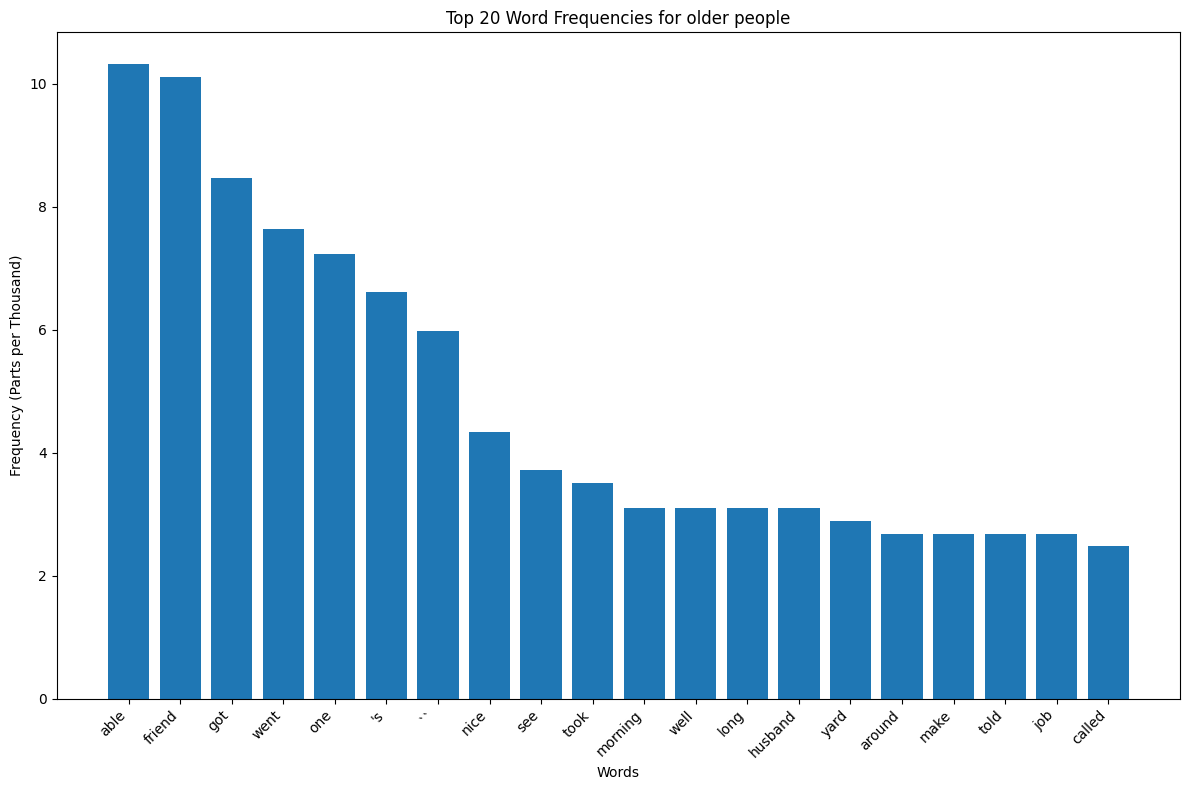

In [148]:
# Create a DataFrame for age group = '60+'
df_60_100 = df2[df2['age_group'] == '60-100']

# Find target people id without children
filtered_df_60_100 = df_60_100[df_60_100['parenthood'] == 'n']

# filter df that only contain people without children
df_filtered_by_wid_60_100 = df[df['wid'].isin(filtered_df_60_100['wid'])]

# Tokenizing the words in 'cleaned_hm'
df_filtered_by_wid_60_100['tokens'] = df_filtered_by_wid_60_100['cleaned_hm'].apply(word_tokenize)

# Flatten the list of tokens and count each word, excluding certain unwanted tokens like empty strings or periods
word_counts = Counter([word.lower() for sublist in df_filtered_by_wid_60_100['tokens'] for word in sublist if word.strip() and word != '.' and word != ',' and word != '!' and word != ')' and word != '('])

# Calculate the total number of words
total_words = sum(word_counts.values())

# Convert the word counts to word frequencies/proportions in parts per thousand
word_frequencies = {word: (count / total_words) * 1000 for word, count in word_counts.items()}

# Convert the dictionary to a DataFrame
freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'ppt'])  # ppt is parts per thousand

# Select the top 100 words
top_words_df = freq_df.head(100).reset_index(drop=True)

# Now take the top 20 out of the top 100
top_20_words = top_words_df.sort_values(by='ppt', ascending=False)[:20]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_words['word'], top_20_words['ppt'])

# Add title and labels
plt.title('Top 20 Word Frequencies for older people')
plt.xlabel('Words')
plt.ylabel('Frequency (Parts per Thousand)')

# Rotate the x-axis labels so they fit and can be read easily
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

Comparing these 4 bar charts for different age groups, I found that the Children group would be happy for talking about family and school. The Youth group would be happy for new things, but family and school are also represented in the top 20. The Adults group is happy almost exclusively because of new things. The Older people group is happy because of their friends and having the ability to do things.

**Each group has a portion of overlapping happy words, but they vary in weights at each age.**

# Conclusions



1.   People without children like new things, are happy with the things they are lucky to have, are happy when they talk about friends and games, and are always happy about the latest thing.
2.   Women without children derive pleasure from those close to them, while Men without children derive more pleasure from themselves
3.   Each group has a portion of overlapping happy words, but they vary in weights at each age.
